<a href="https://colab.research.google.com/github/chan-kh/Music-Sentiment-Analysis/blob/main/LSTM_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime
from google.colab import drive

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.preprocessing import MinMaxScaler

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

from keras import layers
from keras.optimizers import RMSprop
from keras.layers import Bidirectional

from math import sqrt
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/features_60frames_allsongs.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,song_id,frame_num,zcr,rms,spectral_centroid,spectral_bandwidth,spectral_rolloff,spectral_contrast,spectral_flatness,melspectrogram,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,chroma_stft_0,chroma_stft_1,chroma_stft_2,chroma_stft_3,chroma_stft_4,chroma_stft_5,chroma_stft_6,chroma_stft_7,chroma_stft_8,chroma_stft_9,chroma_stft_10,chroma_stft_11,chroma_cqt_0,chroma_cqt_1,chroma_cqt_2,chroma_cqt_3,chroma_cqt_4,chroma_cqt_5,chroma_cqt_6,chroma_cqt_7,chroma_cqt_8,chroma_cqt_9,chroma_cqt_10,chroma_cqt_11,chroma_cens_0,chroma_cens_1,chroma_cens_2,chroma_cens_3,chroma_cens_4,chroma_cens_5,chroma_cens_6,chroma_cens_7,chroma_cens_8,chroma_cens_9,chroma_cens_10,chroma_cens_11,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,valence,arousal
0,2,0,0.157715,0.000011,5604.262879,3246.069688,9549.975586,18.349374,0.283305,0.000000,-636.134705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.654255,0.699066,0.261531,0.874848,1.000000,0.333313,0.812421,0.488101,0.413135,0.640419,0.671442,0.490904,0.725918,0.250459,0.284098,0.647150,0.349017,0.147453,0.501239,0.074669,0.070883,0.633342,0.184297,0.136420,0.700169,0.030602,0.209675,0.828279,0.124886,0.257948,1.000000,0.071105,0.309559,0.798000,0.076693,0.276441,-0.134078,0.072852,-0.134683,0.086125,0.060471,0.042898,-0.073341,-0.109386
1,2,1,0.051758,0.096817,1443.667160,2057.611806,3036.181641,27.017306,0.003931,1.576688,-120.319748,129.464996,-4.253306,22.214062,8.163963,16.415987,15.152133,7.878392,-6.823561,-0.831550,-7.218902,-4.558928,-1.807601,12.948887,-9.162554,-3.758020,-5.506585,-1.227700,-4.439484,1.684063,0.528904,0.624552,0.263783,0.891966,0.850903,0.331133,1.000000,1.000000,0.408033,0.713866,0.681263,0.480444,0.245905,0.378263,0.278916,0.160639,0.397115,0.147040,0.285743,0.536704,0.072041,0.314144,0.652729,0.144099,0.269362,0.637670,0.218737,0.382769,0.677961,0.263132,0.424450,0.649488,0.317883,0.517798,0.579528,0.282752,-0.088692,0.052331,-0.112961,0.075804,0.041915,0.033029,-0.074661,-0.114942
2,2,2,0.101562,0.096426,2348.097128,2387.006355,4941.870117,22.434103,0.013857,0.152583,-107.915352,76.319107,-14.175928,45.124214,1.209538,7.516734,-5.023264,6.480774,-0.513962,8.108901,-0.198636,-3.022716,2.078595,4.819644,-16.200150,-3.348299,-5.746615,-9.680576,-17.688511,-5.846364,0.190785,0.290683,0.265836,0.206553,0.217986,0.329024,0.491271,0.576434,0.402986,1.000000,0.924618,0.469653,0.706139,0.605435,0.273279,0.307669,0.224213,0.146400,0.107266,0.206321,0.073380,0.222554,0.297425,0.151825,0.408395,0.409732,0.227828,0.563377,0.734764,0.268284,0.755202,1.000000,0.326054,0.528056,0.687259,0.288720,-0.034494,0.031843,-0.070020,0.068549,0.021691,0.023202,-0.074077,-0.116413
3,2,3,0.062500,0.086847,1692.187106,1872.280637,3219.213867,21.295763,0.004178,0.224268,-148.255432,121.565720,-36.703545,33.151939,4.518500,5.197342,-8.610166,4.267920,8.706326,-17.273952,-11.429454,4.515498,-7.324573,4.467141,-13.720921,-3.195490,-3.931114,-7.317858,-15.654930,-15.824336,0.245845,0.300974,0.267710,0.523842,0.578168,0.326966,1.000000,0.842026,0.397746,0.846539,1.000000,0.458391,0.477668,0.673670,0.267148,0.095004,0.189054,0.145584,0.031817,0.101448,0.075003,0.024125,0.114284,0.159790,0.044276,0.137589,0.237066,0.215029,0.300263,0.273559,0.177739,0.341496,0.334054,0.110806,0.207098,0.294537,-0.013095,0.020309,-0.055259,0.034349,0.011610,0.012032,-0.078154,-0.118613
4,2,4,0.120605,0.113167,2632.895857,2453.043616,5329.467773,18.914987,0.025196,1.035493,-71.919838,76.267471,-28.003765,15.988888,4.667567,35.548042,-6.664427,-5.128408,9.827440,-1.635414,-5.240368,-1.569069,-1.458279,7.581460,-16.175152,-6.295955,-9.435411,-3.781498,-8.782184,-7.635081,0.223808,0.355715,0.269517,0.202841,0.376315,0.324933,0.624933,0.684395,0.392219,1.000000,1.000000,0.446547,0.319092,0.

In [ ]:
df.shape

(104640, 74)

In [ ]:
df.pop('song_id')
df.pop('frame_num')
df.pop('valence')

0        -0.073341
1        -0.074661
2        -0.074077
3        -0.078154
4        -0.081588
            ...   
104635    0.432000
104636    0.421000
104637    0.429000
104638    0.428000
104639    0.424000
Name: valence, Length: 104640, dtype: float64

In [ ]:
valence_raw = df.pop('arousal')

In [ ]:
# df_mean = df.mean()
# df_std = df.std()

# df = (df - df_mean) / df_std


In [ ]:
# print(type(df))

In [ ]:
features = df.to_numpy()
valence = valence_raw.to_numpy()

In [ ]:
print(features.shape)
print(valence.shape)

(104640, 70)
(104640,)


In [ ]:
features = features.reshape(1744,60,70)
valence = valence.reshape(1744,60,1)

In [ ]:
train_X , train_y = features[0:1220] , valence[0:1220]
test_X , test_y = features[1220:1744] , valence[1220:1744]
# val_X , val_y = features [1569:1744] , valence[0:1220]

In [ ]:
print("train_X :" , train_X.shape , "train_y shape:" , train_y.shape)
print("test_X :" , test_X.shape , "test_y shape:" , test_y.shape)
# print("val_X :" , val_X.shape , "val_y shape:" , val_y.shape)


train_X : (1220, 60, 70) train_y shape: (1220, 60, 1)
test_X : (524, 60, 70) test_y shape: (524, 60, 1)


In [ ]:
# print(features.shape)
# for i in range(1):
#   print(features)

In [ ]:
# print(valence.shape)
# print(valence)

In [ ]:
# print(type(features))
# print(features.shape)

In [ ]:
model = Sequential()

# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
# model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(60,70))))
model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(60,70))))
model.add(Bidirectional(LSTM(32,return_sequences=True, input_shape=(60,70))))
model.add(Bidirectional(LSTM(16,return_sequences=True, input_shape=(60,70))))
model.add(Bidirectional(LSTM(8,return_sequences=True, input_shape=(60,70))))




model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(train_X, train_y, epochs=350, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/550
39/39 - 4s - loss: 0.0671 - val_loss: 0.0315
Epoch 2/550
39/39 - 1s - loss: 0.0531 - val_loss: 0.0353
Epoch 3/550
39/39 - 1s - loss: 0.0495 - val_loss: 0.0272
Epoch 4/550
39/39 - 1s - loss: 0.0495 - val_loss: 0.0278
Epoch 5/550
39/39 - 1s - loss: 0.0531 - val_loss: 0.0304
Epoch 6/550
39/39 - 1s - loss: 0.0490 - val_loss: 0.0272
Epoch 7/550
39/39 - 1s - loss: 0.0478 - val_loss: 0.0257
Epoch 8/550
39/39 - 1s - loss: 0.0468 - val_loss: 0.0253
Epoch 9/550
39/39 - 1s - loss: 0.0473 - val_loss: 0.0243
Epoch 10/550
39/39 - 1s - loss: 0.0465 - val_loss: 0.0243
Epoch 11/550
39/39 - 1s - loss: 0.0453 - val_loss: 0.0248
Epoch 12/550
39/39 - 1s - loss: 0.0448 - val_loss: 0.0245
Epoch 13/550
39/39 - 1s - loss: 0.0481 - val_loss: 0.0247
Epoch 14/550
39/39 - 1s - loss: 0.0474 - val_loss: 0.0251
Epoch 15/550
39/39 - 1s - loss: 0.0476 - val_loss: 0.0252
Epoch 16/550
39/39 - 1s - loss: 0.0454 - val_loss: 0.0253
Epoch 17/550
39/39 - 1s - loss: 0.0450 - val_loss: 0.0239
Epoch 18/550
39/39 - 1s

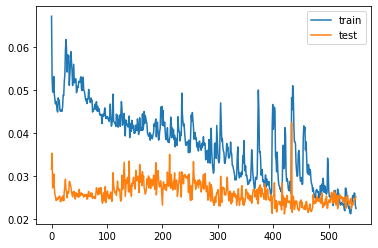

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.savefig("training loss 350epochs_5layers")

In [ ]:
history.history
print('overall loss' , np.mean(history.history['loss']))
print('overall val_loss' , np.mean(history.history['val_loss']))

overall loss 0.037491345392032104
overall val_loss 0.025980778827585958


In [ ]:
predicted_y = model.predict(test_X)

In [ ]:
predicted_y = predicted_y.reshape(31440,)
test_y = test_y.reshape(31440,)

In [ ]:
def metrics(y_true,y_pred,name):
  print(name,"")
  mae = mean_absolute_error(y_true,y_pred)
  rmse = sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  pearson_corr = pearsonr(y_true,y_pred)
  spearman_corr = spearmanr(y_true,y_pred)
  print('MAE : ',mae)
  print('RMSE : ',rmse)
  print('R2 : ',r2)
  print('Pearson : ',pearson_corr)
  print('Spearman : ',spearman_corr,'\n')


In [ ]:
def graph_results(x,y,title, xlim=-1, ylim=-1):
  #x and y are variables ( y_pred vs y_true )
  #Important
  plt.scatter(x,y,s=15)

  # if xlim != -1: plt.xlim([0, xlim])
  # if ylim != -1: plt.ylim([0, ylim])
  # plt.gca().set_ylim([1.5,7.5])
  # plt.gca().set_xlim([1.5,9])
  #Fix 
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title((title))
  # m, b = np.polyfit(x, y, 1)
  # plt.plot(x, m*x + b, color='red')  
  plt.savefig(title)

  plt.show()

arousal 
MAE :  0.12524632206647565
RMSE :  0.158247649210949
R2 :  0.46399230644226896
Pearson :  (0.7204253847799789, 0.0)
Spearman :  SpearmanrResult(correlation=0.716042743625532, pvalue=0.0) 



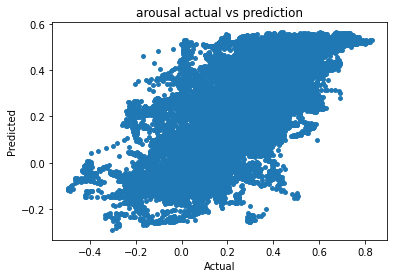

In [ ]:
metrics(test_y,predicted_y,'arousal')
graph_results(test_y,predicted_y,'arousal actual vs prediction')
